In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

train_data = pd.read_csv('input/ml5/train.csv', sep = ";")
test_data = pd.read_csv('input/ml5/test.csv', sep = ";")

train_data.drop('id', axis=1, inplace=True)
test_data.drop('id', axis=1, inplace=True)

y_data = train_data['cardio']
train_data.drop('cardio', axis=1, inplace=True)

In [21]:
print(train_data.shape)
train_data.head(10)

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [43]:
print(test_data.shape)
test_data.head()

(30000, 11)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18888,1,154,85.0,130,80,1,1,0,0,1
1,19042,2,170,69.0,130,90,1,1,None,0,1
2,20432,1,160,70.0,120,75,1,1,0,0,0
3,18133,2,185,94.0,130,90,1,1,None,0,1
4,16093,2,170,76.0,120,80,1,1,0,0,1


In [13]:
train_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
test_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,14208.525667,0.986733,119.979500,54.135745,94.918067,69.220167,1.001167,0.894000,0.063400,0.039333,0.588600
std,8889.752904,0.725195,73.242128,35.115893,182.840570,134.792355,0.842529,0.729416,0.243685,0.194390,0.492096
min,0.000000,0.000000,0.000000,0.000000,-130.000000,-90.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18296.000000,1.000000,160.000000,66.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,20678.000000,2.000000,168.000000,78.000000,130.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,23705.000000,2.000000,198.000000,183.000000,14900.000000,9100.000000,3.000000,3.000000,1.000000,1.000000,1.000000


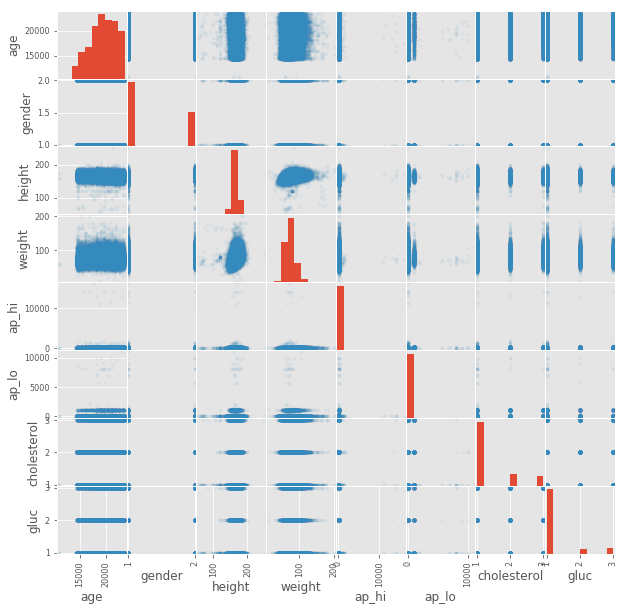

In [35]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(train_data[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']], alpha=0.05, figsize=(10, 10));

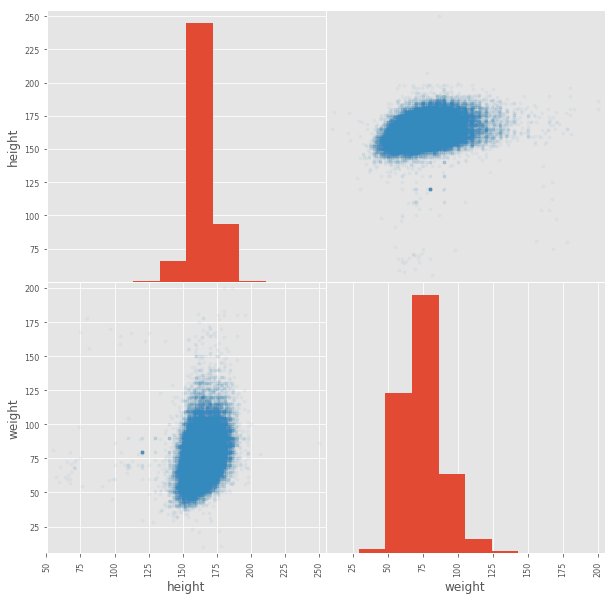

In [41]:
scatter_matrix(train_data[['height', 'weight']], alpha=0.05, figsize=(10, 10));

Судя по распределению, частенько в рост/вес уходит давление 120/80
Есть выбросы со значениями больше 1000 (например, ap_lo) - явно лишний нолик справа

In [ ]:
print(train_data[train_data["height"]==120])

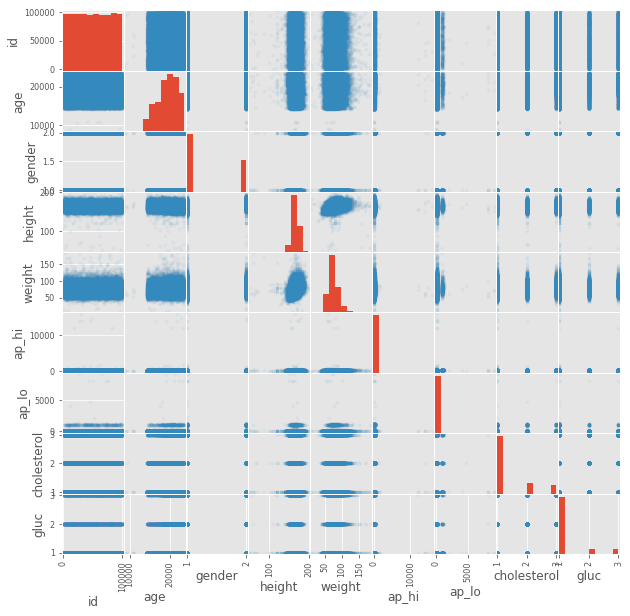

In [24]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(test_data[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']], alpha=0.05, figsize=(10, 10));

In [34]:
train_data[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc
0,18393,2,168,62.0,110,80,1,1
1,20228,1,156,85.0,140,90,3,1
2,18857,1,165,64.0,130,70,3,1
3,17623,2,169,82.0,150,100,1,1
4,17474,1,156,56.0,100,60,1,1
5,21914,1,151,67.0,120,80,2,2
6,22113,1,157,93.0,130,80,3,1
7,22584,2,178,95.0,130,90,3,3
8,17668,1,158,71.0,110,70,1,1
9,19834,1,164,68.0,110,60,1,1


Тут на самом деле будет очистка данных и вот это всё. Но пока просто на сырых поиграем в xgboost

http://xgboost.readthedocs.io/en/latest/python/python_api.html

In [80]:
test_data[test_data["smoke"]=="None"] = 0
test_data[test_data["alco"]=="None"] = 0
test_data[test_data["active"]=="None"] = 1

test_data = test_data.apply(pd.to_numeric)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000000000E847278>>
Traceback (most recent call last):
  File "C:\Users\agurevich\AppData\Local\Continuum\Anaconda3\lib\site-packages\xgboost-0.6-py3.6.egg\xgboost\core.py", line 337, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


In [65]:
from xgboost import XGBClassifier #ВНЕЗАПНО нужны вероятности отнесения к классу, а не предсказания классов.
from sklearn.model_selection  import KFold
from sklearn.model_selection  import GridSearchCV

In [73]:
XGBClassifier().get_params().keys()

dict_keys(['base_score', 'colsample_bylevel', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'nthread', 'objective', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample'])

In [75]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_params = {
    
    'max_depth': range(5,15,5),
    'learning_rate': [0.1],
    'n_estimators': [100],
    'silent': [False]
    
}
 

clf_xgb = XGBClassifier()
gridCV = GridSearchCV(clf_xgb, xgb_params, cv=kfold,scoring='neg_log_loss', n_jobs=1)

gridCV.fit(train_data, y_data)
print(gridCV.best_params_)
print(gridCV.best_score_)


scaled_train_data = scale(train_data, axis=0, with_mean=True, with_std=True, copy=False)

gridCV.fit(scaled_train_data, test_data)
print(gridCV.best_params_)
print(gridCV.best_score_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'silent': False}
-0.539008867878


In [86]:
clf_xgb_predict = XGBClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 100, silent= False)
clf_xgb_predict.fit(train_data, y_data)
submit = clf_xgb_predict.predict(test_data)

In [92]:
np.savetxt("foml5_predicto.csv", submit, delimiter=",")